## Code for ROC curve
Receiver Operating Characteristics (ROC) curve gives us the estimation for model performance based on comparing true positive and false positive rate for various tresholds of our binary target variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we will create some random but imbalanced data
np.random.seed(123)
y_real = np.random.choice([0,1], 300, p=[0.9, 0.1])

In [3]:
# we will create fake prediction that will be very bad, using uniform distribution
y_pred = np.random.uniform(0,1,300)

In [4]:
# we are creating function that transforms the predicted values to the binary outcome according to treshold
def binarize(y_hat, threshold):
    return (y_hat > threshold).astype(int)

In [5]:
def calculate_fpr_tpr(y_real, y_pred_cat, treshold):
    
    positive_indexes=np.where(y_real==1)
    negative_indexes = np.where(y_real==0)
    
    tp = np.sum(y_real[positive_indexes]==y_pred_cat[positive_indexes])
    tn = np.sum(y_real[negative_indexes]==y_pred_cat[negative_indexes])
    
    fp = np.sum(y_real[negative_indexes]!=y_pred_cat[negative_indexes])
    fn = np.sum(y_real[positive_indexes]!=y_pred_cat[positive_indexes])
    
    tpr = tp/(fn+tp)
    fpr = fp/(fp+tn)
    
    
    return tpr, fpr
    

In [6]:
def plotting_ROC(y_real, y_pred):
    tresholds = np.arange(0, 1, 0.01)
    tp_rates = []
    fp_rates = []
    for treshold in tresholds:
        y_pred_cat = binarize(y_pred, treshold)
        
        tpr, fpr = calculate_fpr_tpr(y_real, y_pred_cat, treshold)
        
        tp_rates.append(tpr)
        fp_rates.append(fpr)
    
    plt.figure(figsize=(4,4))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot(fp_rates, tp_rates, 'k--', color = 'red')
    plt.plot([0,1], [0,1], 'k--')
    
    
    return tp_rates, fp_rates
        

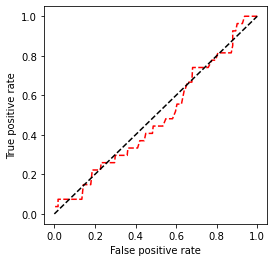

In [7]:
true_positive_rates, false_positive_rates = plotting_ROC(y_real, y_pred)

In [8]:
def auc(false_positive_rates, true_positive_rates):
    y = np.asanyarray(true_positive_rates)
    x = np.asanyarray(false_positive_rates)
    widths = np.abs(np.diff(x))
    heights = (y[1:] + y[:-1]) / 2.0
    area = (widths * heights).sum()
    return area

In [9]:
print('Area under curve: ',round(auc(false_positive_rates, true_positive_rates), 2))

Area under curve:  0.48


### Good model

In [10]:
# Now we will make better model which will have better auc to test our function with famous iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [11]:
iris = load_iris(as_frame=True)
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris= iris[(iris['target']==0) | (iris['target']==1)] # we will work only with binary target to test our code

In [12]:
y = iris['target'].to_numpy()
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)',]].to_numpy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
logit_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [15]:
y_pred = logit_model.predict_proba(X_test)
y_pred = np.asarray([i[1] for i in y_pred])

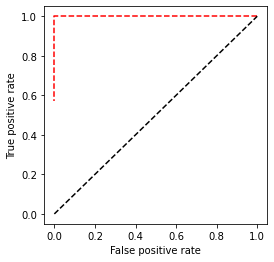

In [16]:
true_positive_rates_good, false_positive_rates_good = plotting_ROC(y_test, y_pred)

In [17]:
print('Area under curve: ',round(auc(false_positive_rates_good, true_positive_rates_good), 2))

Area under curve:  1.0
